<a href="https://colab.research.google.com/github/Rohini06GitHub/github/blob/main/True_and_Fake_News_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
import numpy as np
import pandas as pd
#importing libraries for import data

In [39]:
Test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSets/True and Fake News Prediction/test.csv')

In [40]:
Train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSets/True and Fake News Prediction/train.csv')

# Data Structure and Content

In [41]:
Train.shape# it explains how many rows and coloumns in the data

(20800, 5)

In [42]:
Test.shape# it explains how many rows and coloumns in the data

(5200, 4)

In [43]:
Train.info()# to get the overall information about the train dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [44]:
Test.info()
# to get the overall information about the test dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5078 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB


In [45]:
Train.isnull().sum()# to get the sum of the train

,0
id,0
title,558
author,1957
text,39
label,0


In [46]:
Test.isnull().sum()# to get the sum of the test

,0
id,0
title,122
author,503
text,7


In [47]:
Train.describe()# the description of train textset

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [48]:
Train.head() # the first n of the rows and columns

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [49]:
Test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


# Text Preprocessing


1. Removing the Null Values

In [50]:
Train = Train.fillna(' ')
  # is for use removing null  values

In [51]:
Test = Test.fillna(' ')
  # is for use removing null  values

In [52]:
Train.isnull().sum()# to get the sum of the train by removing null values

,0
id,0
title,0
author,0
text,0
label,0


In [53]:
Test.isnull().sum()# to get the sum of the test by removing null values

,0
id,0
title,0
author,0
text,0


In [54]:
 Train['Subject']=Train['author'] + '' + Train['title']
 # we add the author and title  and store in subject

In [55]:
Train.head()

,id,title,author,text,label,Subject
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell LucusHouse Dem Aide: We Didn’t Even Se...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.comWhy the Truth Might Get You ...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss15 Civilians Killed In Single U...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard PortnoyIranian woman jailed for fiction...


TOKENIZATION

#To separate the Words in the Sentence

In [56]:
import nltk # import the natural language preprocessing for Text

In [57]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [58]:
from nltk.tokenize import word_tokenize
# we import this library for tokenize the word

In [59]:

!pip install nltk # Make sure NLTK is installed
import nltk
nltk.download('punkt') # Download the 'punkt' resource
from nltk.tokenize import word_tokenize
Train['tokens'] = Train['Subject'].apply(word_tokenize)
#here we use Subject for apply tokenize because it contains both title And author

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [60]:
Train.head()# the first n of the rows and columns

,id,title,author,text,label,Subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell LucusHouse Dem Aide: We Didn’t Even Se...,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom...","[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.comWhy the Truth Might Get You ...,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss15 Civilians Killed In Single U...,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard PortnoyIranian woman jailed for fiction...,"[Howard, PortnoyIranian, woman, jailed, for, f..."


LOWERCASING THE TEXT

In [61]:
Train['Subject']= Train['Subject'].str.lower() # it removes the capital letters into small and add lower cases

In [62]:
Train.head()

,id,title,author,text,label,Subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,darrell lucushouse dem aide: we didn’t even se...,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"daniel j. flynnflynn: hillary clinton, big wom...","[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,consortiumnews.comwhy the truth might get you ...,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,jessica purkiss15 civilians killed in single u...,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,howard portnoyiranian woman jailed for fiction...,"[Howard, PortnoyIranian, woman, jailed, for, f..."


REMOVING THE PUNCTUATION MARK

In [63]:
Train['Subject']=Train['Subject'].str.replace('[^\w\s]','')
# is removing the punctuation mark is make for machine learning

In [64]:
Train.head()

,id,title,author,text,label,Subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,darrell lucushouse dem aide: we didn’t even se...,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"daniel j. flynnflynn: hillary clinton, big wom...","[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,consortiumnews.comwhy the truth might get you ...,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,jessica purkiss15 civilians killed in single u...,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,howard portnoyiranian woman jailed for fiction...,"[Howard, PortnoyIranian, woman, jailed, for, f..."


REMOVAL OF STOPWORDS

In [65]:
#stop word means if we remove the words but meaning is not changed
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [66]:
from nltk.corpus import stopwords

In [67]:

SW = set(stopwords.words('english'))
print(SW)
# Showcasing the stopwords in English

{'she', "hasn't", 'by', 'very', 'mightn', "should've", 'him', 'you', 'ourselves', 'if', 'himself', 'whom', 'own', 'of', "isn't", 'they', 'all', 'it', 'weren', 'are', 'above', 'couldn', 'been', 'under', 'out', 'at', 'won', 'yours', 'yourselves', "shan't", 'the', "won't", 'have', "it's", 'had', 'd', 'them', 'in', 'nor', "don't", "haven't", "that'll", 'was', 're', 'ma', 'up', 'herself', 'being', 'my', 'when', 'were', 'below', 'doing', 'or', 'to', 'but', 'on', 'be', 'itself', 'after', "weren't", 'i', 'we', 'her', 'no', 'mustn', 'your', 'with', 'shan', "you'd", 'hasn', 'does', 'wasn', 'over', 'aren', 'isn', 'such', 'having', 'into', 'than', 'before', 'how', 'who', 'this', 'because', 'not', 'once', 's', "aren't", 'about', 'both', 'hers', 'myself', 'now', 'where', 'he', "hadn't", 'each', 'needn', 'just', 'his', 'off', 'while', 'what', 'there', 'until', 'for', 'its', "needn't", 'shouldn', "didn't", 'against', 'will', 'our', 'down', 'which', 'is', 'can', 'most', "mustn't", "you've", 'these', 'o

In [68]:

Train['Subject'] = Train['Subject'].apply(lambda x: ' '.join([word for word in x.split() if word not in SW]))
# Here we try to remove the stopwords by adding only the words which are not in the SW stopword set.
# we use lambda it used to join the words except Stopword

In [69]:
Train.head()

,id,title,author,text,label,Subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,darrell lucushouse dem aide: didn’t even see c...,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"daniel j. flynnflynn: hillary clinton, big wom...","[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,consortiumnews.comwhy truth might get fired,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,jessica purkiss15 civilians killed single us a...,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,howard portnoyiranian woman jailed fictional u...,"[Howard, PortnoyIranian, woman, jailed, for, f..."


    # Stemming : it removes the gerund infinitive
      and get an root word
      Ex: running-run
      lamitization Ex:bank (financial, river bank)

STEMMING OR LAMITIZATION

In [70]:

#To Apply Stemming or Lemmatization :
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
Train['subject'] = Train['Subject'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
# Stemming is the simple process of reducing the words to their root forms

In [71]:
Train.head()

,id,title,author,text,label,Subject,tokens,subject
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,darrell lucushouse dem aide: didn’t even see c...,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ...",darrel lucushous dem aide: didn’t even see com...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"daniel j. flynnflynn: hillary clinton, big wom...","[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ...","daniel j. flynnflynn: hillari clinton, big wom..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,consortiumnews.comwhy truth might get fired,"[Consortiumnews.comWhy, the, Truth, Might, Get...",consortiumnews.comwhi truth might get fire
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,jessica purkiss15 civilians killed single us a...,"[Jessica, Purkiss15, Civilians, Killed, In, Si...",jessica purkiss15 civilian kill singl us airst...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,howard portnoyiranian woman jailed fictional u...,"[Howard, PortnoyIranian, woman, jailed, for, f...",howard portnoyiranian woman jail fiction unpub...


**LOGISTIC REGRESSION**
      Linear Regression: Used to predict a continuous dependent variable (outcome) based on one or more independent variables (features).
       For ***example***, predicting a person’s weight based on their height and age.

**Logistic Regression:**
     Used to predict a categorical dependent variable, typically binary (0 or 1, yes or no).
     ** For example**, predicting whether a student will pass or fail a course based on study hours and attendance.



     TYPES OF LOGISTIC REGRESSION:
           1.BINOMIAL: ex: yes or No
           2.MULTINOMIAL: have 3 0r more  unordered form
           ex:cat,dog,ant
           3.ORDINAL: 3or more ordered types of dependent variable
           ex: small,medium,high.
               bsc,btech,msc,mbbs
        
        Z=W(omega).X+B


  **Sigmoid Function**
             (sigma)z=1%1+e^-z

             here we sub Z=W.X+b

             


# Vectorisation

In [74]:
x=Train['Subject']
y=Train['label']
# th Subject are

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [76]:
var=TfidfVectorizer()
var.fit(x)
#we use this library for vectorize the given text form

TfidfVectorizer()

In [77]:
x.head()

,Subject
0,darrell lucushouse dem aide: didn’t even see c...
1,"daniel j. flynnflynn: hillary clinton, big wom..."
2,consortiumnews.comwhy truth might get fired
3,jessica purkiss15 civilians killed single us a...
4,howard portnoyiranian woman jailed fictional u...


In [78]:
x= var.transform(x)
#tranform the text into data

In [80]:
print(x)

  (0, 33079)	0.366914925227257
  (0, 28535)	0.23892196295360063
  (0, 19033)	0.3820275850000103
  (0, 18468)	0.26516017432226524
  (0, 16501)	0.21869891301153624
  (0, 10589)	0.24595877206394764
  (0, 8617)	0.262805344705785
  (0, 8238)	0.29265226094912294
  (0, 7837)	0.3152444001795075
  (0, 6514)	0.2196425686075596
  (0, 5555)	0.322039963107035
  (0, 1179)	0.2786865349045115
  (1, 35066)	0.36870739989957896
  (1, 14625)	0.24145774937184827
  (1, 11647)	0.5252779475943722
  (1, 7774)	0.31945641437639516
  (1, 6216)	0.23549159548509377
  (1, 5113)	0.45929261659814236
  (1, 4417)	0.18631667500034657
  (1, 3618)	0.3558985572091108
  (2, 32951)	0.35503435084493523
  (2, 20562)	0.414544192391959
  (2, 12513)	0.3247820256479336
  (2, 11392)	0.41013622506425723
  (2, 6879)	0.38721111461402075
  :	:
  (20797, 31752)	0.30843773801046576
  (20797, 27788)	0.24416304091679322
  (20797, 26074)	0.31119045041815785
  (20797, 25697)	0.2456010767304905
  (20797, 21890)	0.07933100338624031
  (20797, 20

In [113]:
# For building the machine learning models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# For evaluating the models using the metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection  import cross_val_score as CVS
from sklearn.metrics import classification_report

In [86]:
x_Train,x_Test,y_Train,y_Test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)
#test_size is shown only 20% if data is shown size

# ModelBuilding

In [91]:
Model=LogisticRegression()
#Logistic Regression is call as Model

In [92]:
Model.fit(x_Train,y_Train)# Fit the model of traing dataset

LogisticRegression()

In [101]:
y_pred=Model.predict(x_Train)
# the training input is placed in the var y_pred

Matrix:
    # ACCURACY = it provifes the proportion of correction classified predicted instance
      ACC=T.D+T.N % T
    # PRECISION
          it focuses on the accuracy of positive prediction its mean predict is true or false
          whereas the negative prediction is wrongly predict

          PRE= % T.P+F.P

    # RECALL:
          means the proportion of correctly predicted positives among all positives

          RECALL=TOTAL POSITIVE % TRUE POSITIVE + FAKE POSITIVE

    #f1 Score:
         it means of precision and recall

          f1= 2*(Precision*Recall % Precision+Recall)


In [104]:
accuracy = accuracy_score(y_Train,y_pred) #we use y_train because we get accuracy score for output train dataset
precision= precision_score(y_Train,y_pred)
recall = recall_score(y_Train,y_pred)
f1 = f1_score(y_Train, y_pred)
#we use y_train because we get accuracy score for output train dataset
print(' Training Accuracy:', accuracy)
#it tells how our accuracy happen
print(' Training Precision:', precision)
#it tells how true statement is precise in the project in the output 95% is pricise the true value correctly
print(' Training Recall:', recall)
# it tells collect  only the positive predictions
print('Training F1 Score:', f1)

 Training Accuracy: 0.9714543269230769
 Training Precision: 0.9503497305354891
 Training Recall: 0.9949579831932773
Training F1 Score: 0.9721423963403906


In [97]:
Y_pred=Model.predict(x_Test)

In [105]:
accuracy = accuracy_score(y_Test,Y_pred)
precision= precision_score(y_Test,Y_pred)
recall = recall_score(y_Test,Y_pred)
f1 = f1_score(y_Test, Y_pred)
#we use y_train because we get accuracy score for output test dataset

print(' Training Accuracy:', accuracy)
#it tells how our accuracy happen for test dataset
print(' Training Precision:', precision)
#it tells how true statement is precise in the project in the output 95% is pricise the true value correctlyfor test dataset
print(' Training Recall:', recall)
# it tells collect  only the positive predictions in test dataset
print('Training F1 Score:', f1)

 Training Accuracy: 0.9538461538461539
 Training Precision: 0.9219098616688978
 Training Recall: 0.9918386941910706
Training F1 Score: 0.9555966697502314


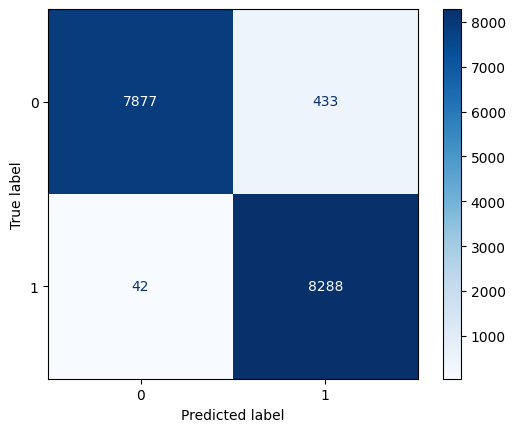

In [107]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
 # Generate the confusion matrix
cm = confusion_matrix(y_train,y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

plt.show()

#confu matrix gives true positive, true negative, false positive, false negative
#7877 - fake news predict correctly
# 8280- it s true and predict true correctly
# 42- true news nu wrong ah predict
# 433 - fake news

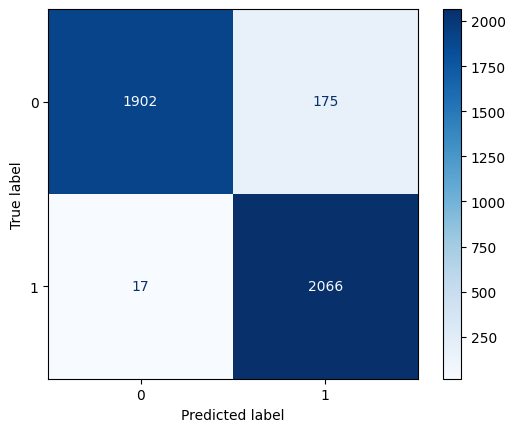

In [109]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
 # Generate the confusion matrix
cm = confusion_matrix(y_test,Y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

plt.show()

In [110]:
import pickle # to saving all project

In [114]:
lr=LogisticRegression

In [115]:
prediction="newsprediction.sav"
pickle.dump(lr,open(prediction,'wb'))